# Exploratory Data Analysis of 'Hazardous Air Pollutant' dataset

Context: Hazardous air pollutants, also known as toxic air pollutants or air toxics, are those pollutants that are known or suspected to cause cancer or other serious health effects, such as reproductive effects or birth defects, or adverse environmental effects. The Environmental Protection Agency (EPA) tracks 187 air pollutants. See https://www.epa.gov/haps/ for more information. Read more here: https://www.kaggle.com/epa/hazardous-air-pollutants


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#download data here: https://www.kaggle.com/epa/hazardous-air-pollutants/download
#import dataset
pollutant_data = pd.read_csv("epa_hap_daily_summary.csv")

In [2]:
#check count of missing values for every feature
pollutant_data.isnull().sum(axis = 0)

state_code                   0
county_code                  0
site_num                     0
parameter_code               0
poc                          0
latitude                     0
longitude                    0
datum                        0
parameter_name               0
sample_duration              0
pollutant_standard     8097069
date_local                   0
units_of_measure             0
event_type                   0
observation_count            0
observation_percent          0
arithmetic_mean              0
first_max_value              0
first_max_hour               0
aqi                    8097069
method_code                  0
method_name                  0
local_site_name        1284490
address                  10202
state_name                   0
county_name                  0
city_name                    0
cbsa_name               954611
date_of_last_change          0
dtype: int64

In [3]:
#check duplicate data
pollutant_data1 = pollutant_data[pollutant_data.duplicated()]
print(pollutant_data1.shape)

In [4]:
#dropping na values
pollutant_data1 = pollutant_data.drop(columns = ['pollutant_standard', 'aqi'])
pollutant_data2 = pollutant_data1.dropna()
len(pollutant_data2)

In [24]:
#convert the object data types to numeric types. Do we remove object features like 'parameter names'? 

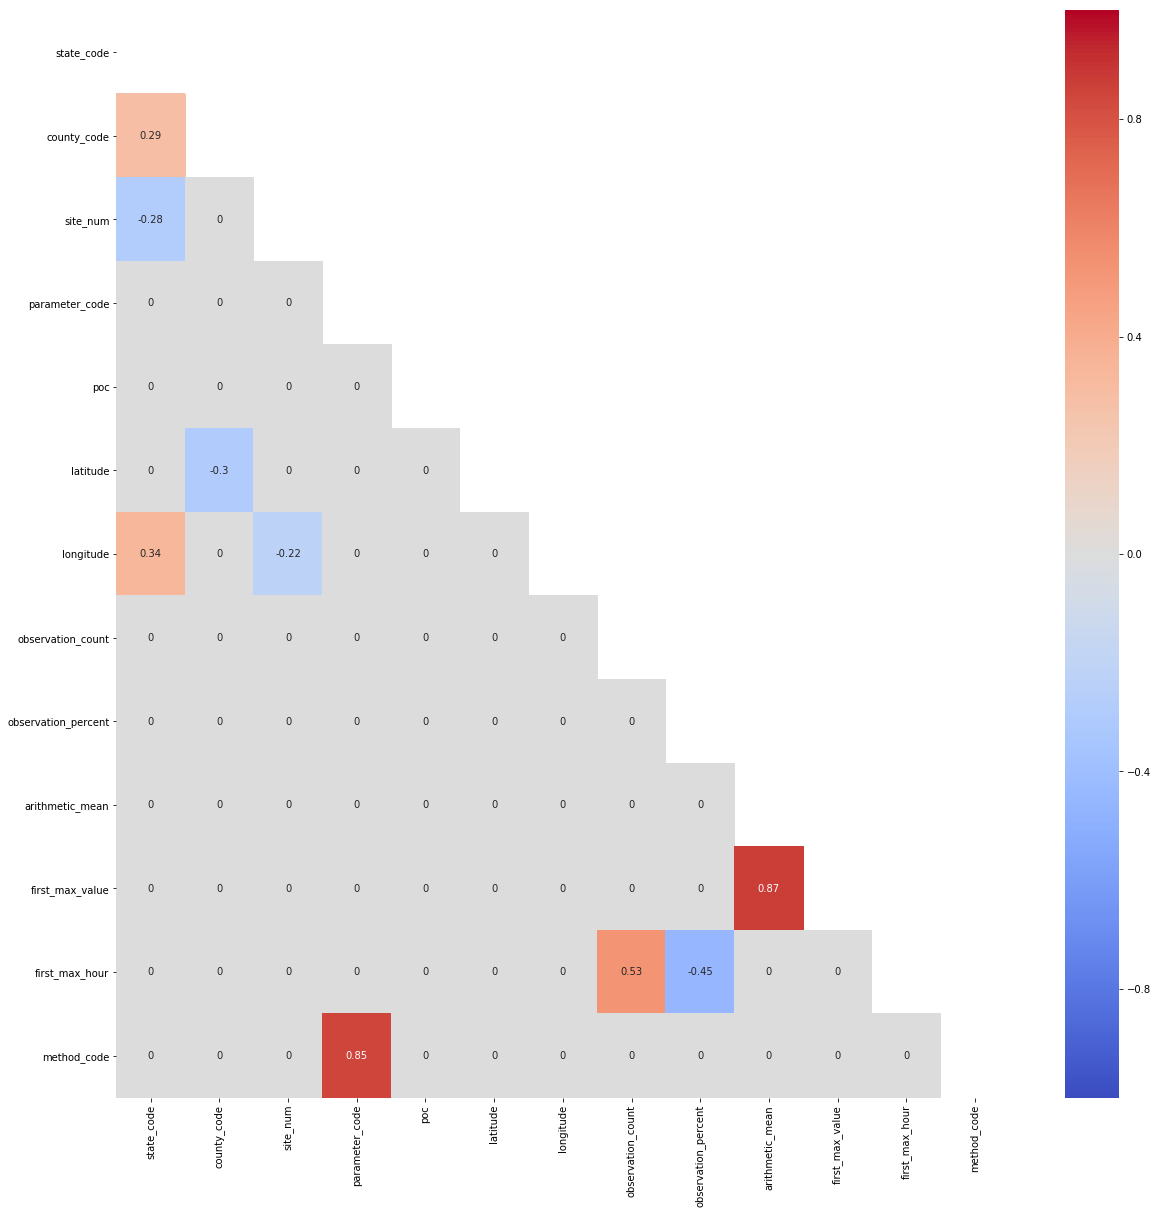

In [44]:
#heatmap to show the correlation between variables
pollutant_data2_corr = pollutant_data2.corr()
pollutant_data2_corr[np.abs(pollutant_data2_corr)<.2] = 0
mask = np.zeros_like(pollutant_data2_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20, 20))
sns.heatmap(pollutant_data2_corr, annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

Plotting for column state_code


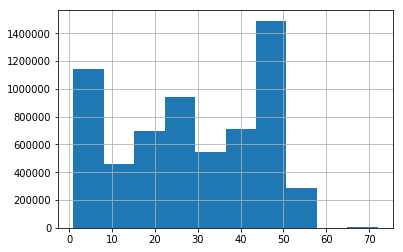

Plotting for column county_code


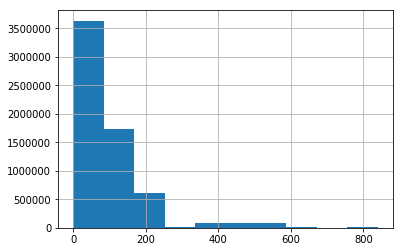

Plotting for column site_num


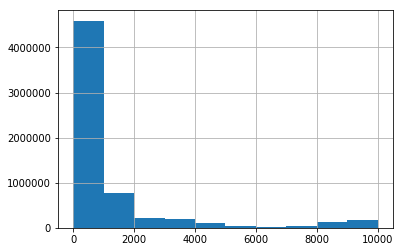

Plotting for column parameter_code


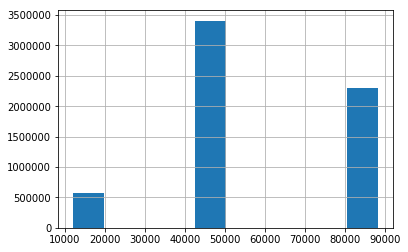

Plotting for column poc


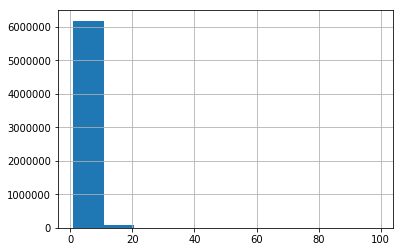

Plotting for column latitude


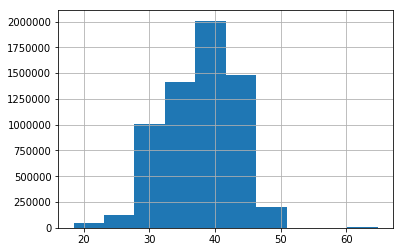

Plotting for column longitude


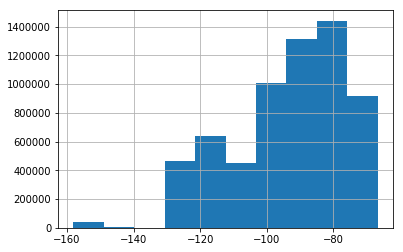

In [ ]:
for col in pollutant_data2.columns:
    hist = pollutant_data2[col].hist(bins=10)
    print("Plotting for column {}".format(col))
    plt.show()

Initial dataset on kaggle had: <br>
 - 8097069 instances
 
 The following features have no values for all instances: pollutant_standard, aqi <br>
 local_site_name about 1.2 million missing values; address 10202; and cbsa_name 954611
 We have to drop the first two for sure and investigate how important they might be as
 predictors, maybe by reading up about them. Also dropping a million of the instances 
 without addresses. Removing the pollutant_standard and aqi columns entirely and removing 
 all instances where there is null/na results in 6278271 instances left. 
 
 There were no duplicate data.
 
We only see high correlation (not complete) between parameter_code and method_code; first_max_value and arithmetric_mean 0.85 and 0.87 respectively.
 